In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#pd.set_option("display.max_columns", 4)
dataset=pd.read_csv('./communities.data',sep=',',engine='python')
list_of_rows = [list(row) for row in dataset.values]
# print(dataset)

In [259]:
dataframe=pd.DataFrame(list_of_rows,columns=['state','county','community','communityname','fold','population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop'])
dataframe = dataframe.replace('?', np.nan)
#All numerical attributes are already normalised
# print(dataframe)

In [260]:
limitPer = len(dataframe) * .20 #delete columns with 20% missing values
dataframe = dataframe.dropna(thresh=limitPer, axis=1)
dataframe=dataframe.dropna() # delete rows with missing values
dataframe=dataframe.reset_index(drop = True) #resets row index
#removing columns not used for predictive purposes
dataframe=dataframe.drop(['state'], axis = 1)
dataframe=dataframe.drop(['county'], axis = 1)
dataframe=dataframe.drop(['community'], axis = 1)
dataframe=dataframe.drop(['communityname'], axis = 1)
dataframe=dataframe.drop(['fold'], axis = 1)
# zscore standardisation
for col in dataframe.columns[dataframe.dtypes == 'float64']:
    dataframe[col] = (dataframe[col] - dataframe[col].mean())/dataframe[col].std(ddof=0)
# print(dataframe)

column = dataframe["ViolentCrimesPerPop"]
# print(column.max())
# print(column.min())
# dataframe.hist(column='ViolentCrimesPerPop')
dataframe['ViolentCrimesCatogorised']=dataframe['ViolentCrimesPerPop']
dataframe['ViolentCrimesCatogorised']=pd.cut(dataframe['ViolentCrimesCatogorised'], bins=[-1, 0, 1, 5], include_lowest=True, labels=['high', 'mid', 'low'])
print(dataframe)



     population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0     -0.062765       2.460495      3.925521     -3.655542      0.007427   
1     -0.327091       0.742355     -0.489374      0.495398     -0.214562   
2     -0.327091      -0.507202     -0.579474      0.638534     -0.436550   
3     -0.150874       0.117576     -0.534424      0.543110      0.081423   
4     -0.327091      -0.116716     -0.579474      0.638534     -0.584543   
..          ...            ...           ...           ...           ...   
812   -0.327091      -0.194813     -0.534424      0.638534     -0.658539   
813    0.025343       0.508063     -0.489374      0.590822     -0.584543   
814   -0.327091       1.523328     -0.579474      0.733958     -0.806532   
815    0.994537      -0.663397      0.546775     -0.745113     -0.584543   
816    0.289669       0.429965     -0.309174      0.113703      0.747389   

     racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0       0.2

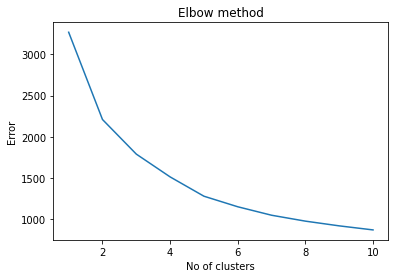

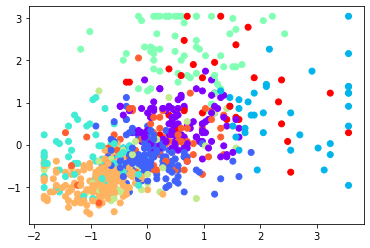

In [261]:
#applying K-means clustering
x = dataframe.loc[:, ['blackPerCap','whitePerCap','indianPerCap','AsianPerCap']].values
kmeans = KMeans(n_clusters=9)
y_kmeans = kmeans.fit_predict(x)
# print(y_kmeans)

# kmeans5.cluster_centers_

#finding optimal number of clusters
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

plt.scatter(x[:,0],x[:,1],c=y_kmeans,cmap='rainbow')

[[102   5   7]
 [ 11   3   0]
 [ 29   5   2]]
              precision    recall  f1-score   support

        high       0.72      0.89      0.80       114
         low       0.23      0.21      0.22        14
         mid       0.22      0.06      0.09        36

    accuracy                           0.65       164
   macro avg       0.39      0.39      0.37       164
weighted avg       0.57      0.65      0.59       164



Text(0, 0.5, 'Mean Error')

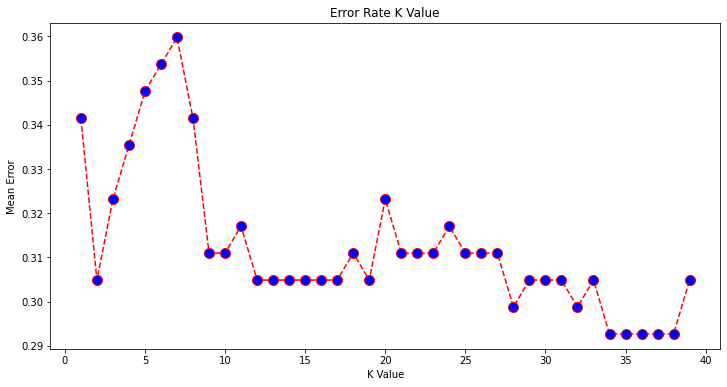

In [262]:
X = dataframe.loc[:, ['blackPerCap','whitePerCap','indianPerCap','AsianPerCap']].values
y = dataframe.loc[:, 'ViolentCrimesCatogorised'].values

#splitting the dataset into 80% train data and 20% test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')